In [1]:
import pandas as pd
import env
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
# retrieving df_iris dataset

In [3]:
df_iris=data('iris')

In [4]:
# find out the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
# find out the shape of the dataframe
df_iris.shape

(150, 5)

In [6]:
# find out the columns name
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
# describe data type of each columns
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
# find out summary of each numeric variables
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# retrieve data from google 

In [10]:
df_google='https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
df_google_csv = df_google.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_csv = pd.read_csv(df_google_csv)

In [11]:
# retrieve first three rows
df_google_csv.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
# find out how many rows and columns
df_google_csv.shape

(891, 12)

In [13]:
# find out each columns name
df_google_csv.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# find out data type of each columns
df_google_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# summary of numeric variables
df_google_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# print unique value of each categorical variables
df_unique = df_google_csv.select_dtypes(exclude=['int', 'float'])
df_unique.nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [17]:
df_unique.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [18]:
 df_unique.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
df_unique.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [20]:
df_unique.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

In [21]:
df_unique.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# read excel file

In [23]:
df_excel= pd.read_excel(io='~/Downloads/Excel_Exercises.xlsx')

In [24]:
# retrieve first 100 rows
df_excel.sample=df_excel.head(100)
df_excel.sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0.0,Yes,Yes,1.0,1.0,1.0,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1.0,Yes,No,1.0,2.0,2.0,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0.0,Yes,No,2.0,2.0,2.0,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1.0,No,No,1.0,1.0,0.0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0.0,Yes,Yes,2.0,1.0,2.0,Mailed check,90.45,5957.90,No


In [25]:
# find out how many rows and columns
df_excel.shape

(7049, 12)

In [26]:
# find out first 5 columns name
df_excel.columns[0:4]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner'], dtype='object')

In [27]:
# find out columns name that has object data type
df_excel.select_dtypes(include=['object']).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [28]:
# compare the range of each numeric value
df_excel.select_dtypes(include=['float64','int']).max()-df_excel.select_dtypes(include=['float64','int']).min()

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

In [ ]:
# prep exercise

Code in prepare.py and acquire.py

Acaquire.py

import os
import env
import pandas as pd
import csv

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_titanic_data():
    filename = "titanic.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

def get_iris_data():
    filename = "iris.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM measurements JOIN species USING (species_id)', get_connection('iris_db'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  
        
def get_telco_data():
    filename = "telco.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM customers JOIN customer_subscriptions USING (customer_id) JOIN customer_contracts USING(customer_id) JOIN customer_payments USING (customer_id) JOIN internet_service_types WHERE internet_service_types.internet_service_type_id=customers.internet_service_type_id', get_connection('telco_churn'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

# prep exercise
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import acquire
import warnings
import pandas as pd

# iris data
def prep_iris(df):
    df_iris=acquire.get_iris_data()
    df_iris.drop(columns=['species_id','measurement_id','Unnamed: 0'],inplace=True)
    df_iris.rename(columns={'species_name':'species'},inplace=True)
    dummy_df_iris= pd.get_dummies(df_iris.species, dummy_na=False, drop_first=[True])
    df_iris=pd.concat([df_iris,dummy_df_iris],axis=1)
    return df_iris

def split_iris(df):
    train, iris_test = train_test_split(df_iris, test_size=.2, 
                               random_state=123, stratify=df_iris['versicolor'])
    iris_train, iris_validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.versicolor)
    
    return iris_train, iris_validate, iris_test


# titanic data

def prep_titanic(df):
    df_titanic=acquire.get_titanic_data(df)
    df_titanic.drop(columns=['Unnamed: 0','embarked','age','deck','class'],inplace=True)
    dummy_df_titanic = pd.get_dummies(df_titanic[['sex','embark_town']], dummy_na=False, drop_first=[True])
    df_titanic=pd.concat([df_titanic ,dummy_df_titanic],axis=1)
    return df_titanic


def split_titanic(df):
    train, titanic_test = train_test_split(df_titanic, test_size=.2, 
                               random_state=123, stratify=df_titanic['survived'])
    titanic_train, titanic_validate = train_test_split(train, test_size=.25, 
                 random_state=123, stratify=train.survived)
    
    return titanic_train, titanic_validate, titanic_test

# telco data

def prep_telco(df):
    df_telco=acquire.get_telco_data(df)
    df_telco.drop(columns=['internet_service_type_id','contract_type_id','payment_type_id',
                       ],inplace=True)
    dummy_df_telco = pd.get_dummies(df_telco[['partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','internet_service_type']], dummy_na=False, drop_first=[True])
    df_telco=pd.concat([df_telco ,dummy_df_telco],axis=1)
    df_telco.drop(columns=['partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','internet_service_type'],inplace=True)
    return df_telco


def split_telco(df):
    train, telco_test = train_test_split(df_telco, test_size=.2, 
                               random_state=123)
    telco_train, telco_validate = train_test_split(train, test_size=.25, 
                 random_state=123)
    
    return telco_train, telco_validate, telco_test


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
import prepare
import acquire

In [39]:
iris_df=acquire.get_iris_data()
prep_iris=prepare.prep_iris(iris_df)
iris_train,iris_validate,iris_test=prepare.split_iris(prep_iris)

In [ ]:
# Exploration

In [ ]:
# problem1-1
# Data has been acquired, prepared ans plited in previous exercise

In [40]:
iris_train.shape,iris_validate.shape,iris_test.shape

((90, 7), (30, 7), (30, 7))

In [ ]:
# exploration 1-2

In [43]:
iris_train

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
67,5.8,2.7,4.1,1.0,versicolor,1,0
83,6.0,2.7,5.1,1.6,versicolor,1,0
3,4.6,3.1,1.5,0.2,setosa,0,0
91,6.1,3.0,4.6,1.4,versicolor,1,0
111,6.4,2.7,5.3,1.9,virginica,0,1
60,5.0,2.0,3.5,1.0,versicolor,1,0
55,5.7,2.8,4.5,1.3,versicolor,1,0
121,5.6,2.8,4.9,2.0,virginica,0,1
114,5.8,2.8,5.1,2.4,virginica,0,1
126,6.2,2.8,4.8,1.8,virginica,0,1


In [44]:
iris_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 67 to 28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  90 non-null     float64
 1   sepal_width   90 non-null     float64
 2   petal_length  90 non-null     float64
 3   petal_width   90 non-null     float64
 4   species       90 non-null     object 
 5   versicolor    90 non-null     uint8  
 6   virginica     90 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.4+ KB


In [45]:
iris_train.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
count,90.000000,90.000000,90.000000,90.000000,90,90.000000,90.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,versicolor,NaN,NaN
freq,NaN,NaN,NaN,NaN,30,NaN,NaN
mean,5.826667,3.075556,3.744444,1.223333,NaN,0.333333,0.333333
std,0.817752,0.462847,1.761965,0.771115,NaN,0.474045,0.474045
min,4.300000,2.000000,1.000000,0.100000,NaN,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,NaN,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,NaN,0.000000,0.000000
75%,6.400000,3.375000,5.100000,1.800000,NaN,1.000000,1.000000


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'versicolor'}>,
        <AxesSubplot:title={'center':'virginica'}>]], dtype=object)

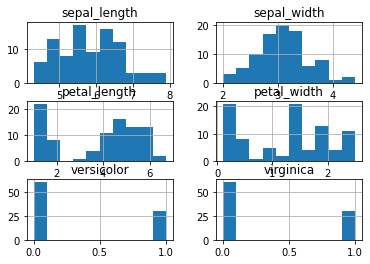

In [51]:
iris_train.hist()

<AxesSubplot:>

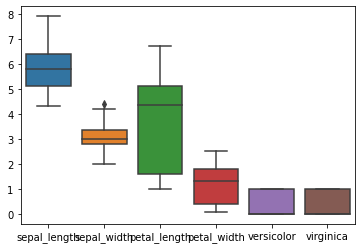

In [48]:
sns.boxplot(data=iris_train)

species
versicolor    30
setosa        30
virginica     30
Name: species, dtype: int64
versicolor    33.333333
setosa        33.333333
virginica     33.333333
Name: species, dtype: float64


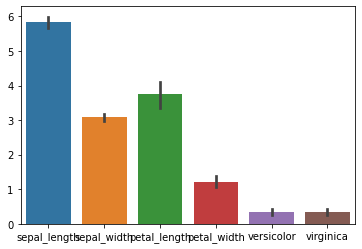

In [56]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','species','versicolor','virginica']
cat_vars=['species']
for col in cat_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.barplot(data=iris_train)
    plt.show()

###Takeaway: 
The training data set of Iris took 90 samples from the original dataset
The training data is equally spereated by species.
The sepal length has distribution of intested, we will explore more info of sepal length in order analysis whether it is the way to indicate species.

In [116]:
# problem 1-3
iris_train.groupby('species',as_index=False).agg('mean')

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.033333,3.466667,1.446667,0.273333,0.0,0.0
1,versicolor,5.920000,2.726667,4.276667,1.326667,1.0,0.0
2,virginica,6.526667,3.033333,5.510000,2.070000,0.0,1.0


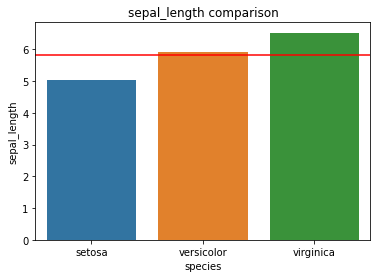

In [121]:
plt.title('sepal_length comparison')
mean=iris_train.groupby('species',as_index=False).agg('mean')
sns.barplot(x=mean.species, y=mean.sepal_length,data=iris_train)
plt.axhline(mean.sepal_length.mean(),label='average',color='red',linestyle='solid')
plt.show()

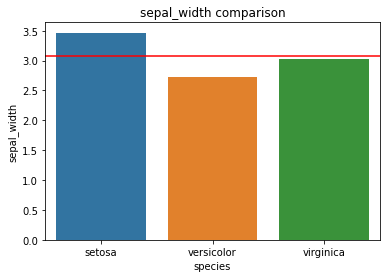

In [123]:
plt.title('sepal_width comparison')
mean=iris_train.groupby('species',as_index=False).agg('mean')
sns.barplot(x=mean.species, y=mean.sepal_width,data=iris_train)
plt.axhline(mean.sepal_width.mean(),label='average',color='red',linestyle='solid')
plt.show()

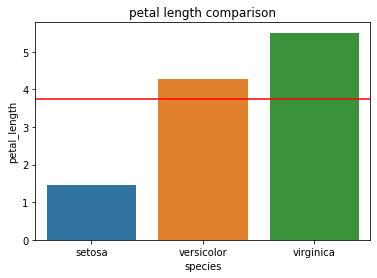

In [124]:
plt.title('petal length comparison')
mean=iris_train.groupby('species',as_index=False).agg('mean')
sns.barplot(x=mean.species, y=mean.petal_length,data=iris_train)
plt.axhline(mean.petal_length.mean(),label='average',color='red',linestyle='solid')
plt.show()

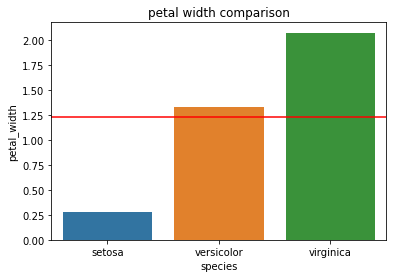

In [125]:
plt.title('petal width comparison')
mean=iris_train.groupby('species',as_index=False).agg('mean')
sns.barplot(x=mean.species, y=mean.petal_width,data=iris_train)
plt.axhline(mean.petal_width.mean(),label='average',color='red',linestyle='solid')
plt.show()

In [62]:
iris_train[iris_train.species=='versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.920000,2.726667,4.276667,1.326667,1.0,0.0
std,0.534596,0.310654,0.511713,0.204995,0.0,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0,0.0
25%,5.525000,2.500000,4.000000,1.300000,1.0,0.0
50%,6.000000,2.800000,4.350000,1.300000,1.0,0.0
75%,6.200000,2.900000,4.675000,1.475000,1.0,0.0
max,6.900000,3.200000,5.100000,1.800000,1.0,0.0


In [63]:
iris_train[iris_train.species=='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,6.526667,3.033333,5.510000,2.070000,0.0,1.0
std,0.666919,0.300956,0.499897,0.285452,0.0,0.0
min,4.900000,2.500000,4.500000,1.400000,0.0,1.0
25%,6.125000,2.800000,5.100000,1.825000,0.0,1.0
50%,6.500000,3.000000,5.550000,2.050000,0.0,1.0
75%,6.875000,3.200000,5.800000,2.300000,0.0,1.0
max,7.900000,3.800000,6.700000,2.500000,0.0,1.0


In [64]:
iris_train[iris_train.species=='setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,5.033333,3.466667,1.446667,0.273333,0.0,0.0
std,0.393335,0.429381,0.190703,0.122990,0.0,0.0
min,4.300000,2.300000,1.000000,0.100000,0.0,0.0
25%,4.800000,3.200000,1.325000,0.200000,0.0,0.0
50%,5.000000,3.450000,1.450000,0.200000,0.0,0.0
75%,5.350000,3.775000,1.575000,0.400000,0.0,0.0
max,5.800000,4.400000,1.900000,0.600000,0.0,0.0


In [73]:
from scipy.stats import mannwhitneyu
setosa=iris_train[iris_train.species=='setosa']
virginica=iris_train[iris_train.species=='virginica']
versicolor=iris_train[iris_train.species=='versicolor']

In [78]:
Tst= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in Tst:
    t, p = stats.mannwhitneyu(setosa[var], virginica[var], alternative="greater")
    print(f'Comparing {var} between setosa and virginica')
    print(t, p)

Comparing sepal_length between virginica and versicolor
26.0 0.9999999998348559
Comparing sepal_width between virginica and versicolor
729.5 1.7163765672727344e-05
Comparing petal_length between virginica and versicolor
0.0 0.9999999999876663
Comparing petal_width between virginica and versicolor
0.0 0.9999999999907601


In [79]:
Tst= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in Tst:
    t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)

Comparing sepal_length between virginica and versicolor
691.0 0.00018416360837765575
Comparing sepal_width between virginica and versicolor
680.0 0.0003184419450530266
Comparing petal_length between virginica and versicolor
875.5 1.5843839920641663e-10
Comparing petal_width between virginica and versicolor
883.5 6.137076210842122e-11


In [80]:
Tst= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in Tst:
    t, p = stats.mannwhitneyu(versicolor[var], setosa[var], alternative="greater")
    print(f'Comparing {var} between setosa and versicolor')
    print(t, p)

Comparing sepal_length between setosa and versicolor
816.5 2.9537373452885142e-08
Comparing sepal_width between setosa and versicolor
56.5 0.9999999974181087
Comparing petal_length between setosa and versicolor
900.0 1.3609128364221829e-11
Comparing petal_width between setosa and versicolor
900.0 9.071464984155218e-12


In [ ]:
# problem1-4

In [ ]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.relplot(x='species', y=col, data=iris_train)
    plt.show()

In [ ]:
num_vars=['sepal_length','sepal_width','petal_length','petal_width','versicolor','virginica']
cat_vars=['species']
for col in num_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.swarmplot(x='species',y=col,data=iris_train)
    plt.show()

In [ ]:
# we can use petal_width to determine the species
# H0=every species petal_width are no different
# H1=we can use petal width to determine what species they are

In [ ]:
versicolor_w = iris_train[iris_train.species == 'versicolor'].sepal_width
virginica_w = iris_train[iris_train.species == 'virginica'].sepal_width
setosa_w = iris_train[iris_train.species == 'setosa'].sepal_width

In [ ]:
versicolor_w.hist()

In [ ]:
virginica_w.hist()

In [ ]:
setosa_w.hist()

In [ ]:
versicolor_w.var(),virginica_w.var(),setosa_w.var()

In [ ]:
f, p = stats.f_oneway(versicolor_w, virginica_w, setosa_w)
f, p

In [ ]:
if p < 0.05:
    print("we can use petal width to determine what species they are")
else:
    print("every species petal_width are no different")

In [ ]:
# problem2-1

In [ ]:
ac_df_titanic=acquire.get_titanic_data()

In [ ]:
pr_titanic=prepare.prep_iris(ac_df_titanic)

In [ ]:
ti_train, ti_validate, ti_test = prepare.split_titanic(pr_titanic)

In [ ]:
ti_train

In [ ]:
ti_train.drop(columns=['passenger_id','sex','embark_town'],inplace=True)

In [ ]:
# problem2-2

In [ ]:
ti_train.info()

In [ ]:
ti_train.describe(include='all')

In [ ]:
ti_train.hist()

In [ ]:
num_vars=['pclass','sibsp','parch','fare','alone','sex_male','embark_town_Queenstown','embark_town_Southampton']
tar_vars=['survived']
for col in num_vars:
    print(col)
    print(ti_train[col].value_counts())
    print(ti_train[col].value_counts(normalize=True)*100)
    sns.boxplot(x='survived',y=col, data=ti_train)
    plt.show()

In [ ]:
# problem2-3

In [ ]:
num_vars=['pclass','sibsp','parch','fare','alone','sex_male','embark_town_Queenstown','embark_town_Southampton']
tar_vars=['survived']
for col in num_vars:
    print(col)
    print(ti_train[col].value_counts())
    print(ti_train[col].value_counts(normalize=True)*100)
    sns.barplot(x='survived',y=col, data=ti_train)
    plt.show()

In [ ]:
ti_train[ti_train.survived==0].describe()

In [ ]:
ti_train[ti_train.survived==1].describe()

In [ ]:
from scipy.stats import mannwhitneyu
st,p=mannwhitneyu(ti_train.survived,ti_train)
p<0.05

In [ ]:
# problem 2-4

In [ ]:
# Whether the number of parch increase the survival rate

In [ ]:
# H0=the number of parch shows no difference on the survival rate

In [ ]:
# H1=the number of parch decreased the survival rate

In [ ]:
with_parch_sample = ti_train[ti_train.parch >= 1].survived
with_parch_sample.hist()

In [ ]:
without_parch_sample = ti_train[ti_train.parch == 0].survived
without_parch_sample.hist()

In [ ]:
without_parch_sample.var(), with_parch_sample.var()

In [ ]:
t, p = stats.ttest_ind(without_parch_sample, with_parch_sample, equal_var=False)
t, p / 2

In [ ]:
if p / 2 > 0.05:
    print("There are difference between with parch and without parch")
elif t < 0:
    print("There are difference between with parch and without parch")
else:
    print("There are no difference between with parch and without parch")


In [ ]:
# problem3

In [ ]:
ac_df_telco=acquire.get_telco_data()

In [ ]:
pr_telco=prepare.prep_iris(ac_df_telco)

In [ ]:
tl_train, tl_validate, tl_test = prepare.split_telco(pr_telco)

In [ ]:
tl_train.total_charges=tl_train.total_charges.replace(' ',0).astype(float)

In [ ]:
tl_train.info()

In [ ]:
tl_train.drop(columns=['Unnamed: 0','phone_service.1',
                       'multiple_lines.1', 'internet_service_type_id.1', 'online_security.1',
                       'online_backup.1', 'device_protection.1', 'tech_support.1',
                       'streaming_tv.1', 'streaming_movies.1', 'contract_type_id.1',
                       'paperless_billing.1', 'payment_type_id.1', 'monthly_charges.1',
                       'total_charges.1', 'internet_service_type_id.2'],inplace=True)

In [ ]:
# whether depends increase the churn

In [ ]:
sns.barplot(x='gender',y='total_charges',data=tl_train,hue='churn_Yes')

In [ ]:
sns.pairplot(data=tl_train, hue="churn_Yes", vars=['churn_Yes','streaming_tv_Yes'])

In [ ]:
sns.barplot(data=tl_train, x="churn_Yes", y="total_charges",hue='tech_support_Yes')

In [ ]:
sns.relplot(data=tl_train, x="churn_Yes", y="total_charges")

In [ ]:
sns.displot(tl_train, x="dependents_Yes", y="total_charges", hue="churn_Yes", kind="kde")

In [ ]:
sns.displot(tl_train, x="gender", y="monthly_charges", hue='churn_Yes',binwidth=(2, .5))

In [ ]:
sns.pairplot(tl_train,hue='churn_Yes')

In [ ]:
g = sns.FacetGrid(tl_train, col="gender", hue="churn_Yes")
g.map(sns.scatterplot, "multiple_lines_Yes", "monthly_charges", alpha=.7)
g.add_legend()

In [ ]:
pal= dict(Churn='1')
g = sns.FacetGrid(tl_train, hue="churn_Yes", height=5)
g.map(sns.scatterplot, "gender", "monthly_charges", s=100, alpha=.5)
g.add_legend()

In [ ]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tl_train, row="online_backup_Yes", col="churn_Yes", margin_titles=True)
g.map(sns.scatterplot, "tenure", "gender", color="#334488")
g.set_axis_labels("tenure", "gender")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust()